<a href="https://colab.research.google.com/github/stephaniesanjines/ds10finalproject/blob/main/CryptoGangModelling_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title: Looking At the Past To Predict The Price of Bitcoin

This notebook was co-authored by:



1.   Brian Nzuki
2.   Iona Clark
3.  Joana Avrami
4. Stephanie Sanjines
  

This Notebook guides you on how to build Models that are useful in predicting the price of Bitcoin. Main Models discussed are: Simple Linear Regression, Multiple Linear Regression,K-Nearest Neighbors and Support Vector Machines (SVM). 



In [ ]:
#import the relevant dependencies
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,  recall_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
import statsmodels.api as sm
from statsmodels import graphics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# Some useful libraries to import data
import requests
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

# Libraries for visualizations
from matplotlib import pyplot as plt
import seaborn as sns
# Some settings to make the plots prettier
%matplotlib inline
# sns.set_theme(style="ticks")
# sns.set_context("talk", font_scale=0.9)
# sns.set(font_scale = 1)
# plt.style.use('bmh')


We start by using pandas to retrieve the data for the cryptocurrencies from the Yahoo Finance Website. (These lines of code direclty download the data to your computer the same way we pull it from Github. 

In [ ]:
from pandas_datareader import data

# We would like all available data from 2019-01-01until 2021-01-01.
start_date = '2019-01-01'
end_date = '2021-01-01'

# User pandas_reader.data.DataReader to load the desired data. 
bitcoin = data.DataReader('BTC-USD', 'yahoo', start_date, end_date)
ethereum = data.DataReader('ETH-USD', 'yahoo', start_date, end_date)
litecoin = data.DataReader('LTC-USD', 'yahoo', start_date, end_date)
xrp = data.DataReader('XRP-USD', 'yahoo', start_date, end_date)
tether = data.DataReader('USDT-USD', 'yahoo', start_date, end_date)
nasdaq = data.DataReader('^IXIC', 'yahoo', start_date, end_date)
dow = data.DataReader('^DJI', 'yahoo', start_date, end_date)
snp = data.DataReader('^GSPC', 'yahoo', start_date, end_date)

#saving our data to csv files
bitcoin.to_csv('bitcoin_csv.csv')
ethereum.to_csv('ethereum_csv.csv')
litecoin.to_csv('litecoin_csv.csv')
xrp.to_csv('xrp_csv.csv')
tether.to_csv('tether_csv.csv')
snp.to_csv('snp_data.csv')
dow.to_csv('dow_data.csv')


We will then merge the data sets into one big data-frame keeping only the columns containing the closing prices of the cryptocurrencies Bitcoin, Ethereum, Litecoin, XRP and Tether. 

In [ ]:
#confirm if the data have the same shapes before we merge them together
bitcoin.shape, ethereum.shape, litecoin.shape, xrp.shape, tether.shape


((729, 6), (729, 6), (729, 6), (729, 6), (729, 6))

In [ ]:
bitcoin.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4.324201e+09,3843.520020
2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5.244857e+09,3943.409424
2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4.530215e+09,3836.741211
2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4.847965e+09,3857.717529
2019-01-05,3904.903076,3836.900146,3851.973877,3845.194580,5.137610e+09,3845.194580


In [ ]:
#check for null values. this was done for all the datasets using this line of code
bitcoin.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
#merge our data set by taking only the closing prices
df3 = pd.concat([bitcoin['Close'],ethereum['Close'], litecoin['Close'], xrp['Close'], tether['Close']], axis=1)
#rename the columns
df3.columns = ['BITCOINPrice', 'ETHEREUMPrice', 'LITCOINPrice','XRPPrice', 'TETHERPrice']
df3.head()

,BITCOINPrice,ETHEREUMPrice,LITCOINPrice,XRPPrice,TETHERPrice
Date,,,,,
2019-01-01,3843.520020,140.819412,31.979931,0.364771,1.018335
2019-01-02,3943.409424,155.047684,33.433681,0.375243,1.024012
2019-01-03,3836.741211,149.135010,32.026699,0.360224,1.019473
2019-01-04,3857.717529,154.581940,32.404167,0.356747,1.017200
2019-01-05,3845.194580,155.638596,34.936867,0.355275,1.018489


We can visualize how the scatter plots for the variable look like.

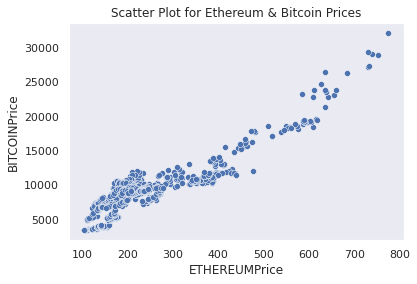

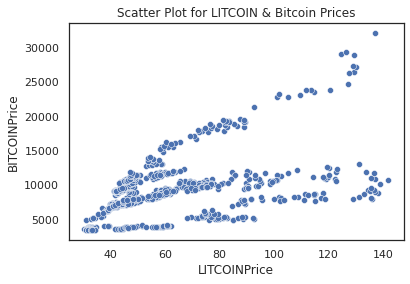

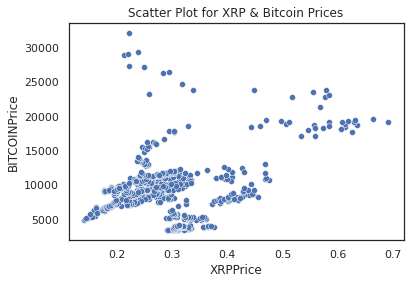

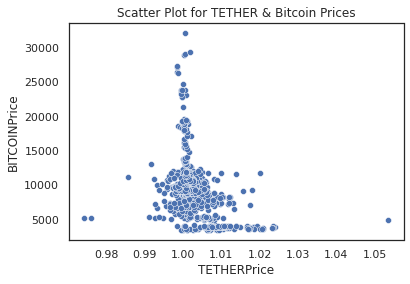

In [ ]:
#let us create some scatter plots of these variables
X_lr_1 = df3.ETHEREUMPrice
y_lr_1 = df3.BITCOINPrice

# Scatterplot for Ethereum Price and Bitcoin Price
sns.set_theme(style="dark")
sns.scatterplot(data = df3, x='ETHEREUMPrice', y='BITCOINPrice')
plt.title('Scatter Plot for Ethereum & Bitcoin Prices')
plt.show()
#scatter plot2
sns.set_theme(style="white")
sns.scatterplot(x=df3.LITCOINPrice, y=y_lr_1)
plt.title('Scatter Plot for LITCOIN & Bitcoin Prices')
plt.show()
#scatter plot3
sns.set_theme(style="white")
sns.scatterplot(x=df3.XRPPrice, y=y_lr_1)
plt.title('Scatter Plot for XRP & Bitcoin Prices')
plt.show()
#scatter plot4
sns.set_theme(style="white")
sns.scatterplot(x=df3.TETHERPrice, y=y_lr_1)
plt.title('Scatter Plot for TETHER & Bitcoin Prices')
plt.show()




Creating Simple Linear Regression Models for our data to predict the price of Bitcoin.



1.   Ethereum-Bitcoin Model




In [ ]:
#Building the models
X_lr_1 = df3.ETHEREUMPrice
y_lr_1 = df3.BITCOINPrice
# Create new training and test sets
X_train_lr_1, X_test_lr_1, y_train_lr_1, y_test_lr_1 = train_test_split(X_lr_1, y_lr_1,
                                                    test_size=0.2,
                                                    random_state=0)

# Creating the linear regression model (for one feature)
lr_1_model = sm.OLS(y_train_lr_1, sm.add_constant(X_train_lr_1) )

# Fitting the model to the data (i.e., training the model)
lr_1_results = lr_1_model.fit()

# Printing summary statistics of the model
print(lr_1_results.summary())

# Predictions on the test set
lr_1_preds = lr_1_results.predict(sm.add_constant(X_test_lr_1))


                            OLS Regression Results                            
Dep. Variable:           BITCOINPrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3067.
Date:                Wed, 05 May 2021   Prob (F-statistic):          5.87e-234
Time:                        04:35:02   Log-Likelihood:                -5160.5
No. Observations:                 583   AIC:                         1.032e+04
Df Residuals:                     581   BIC:                         1.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1898.3476    151.588     12.523

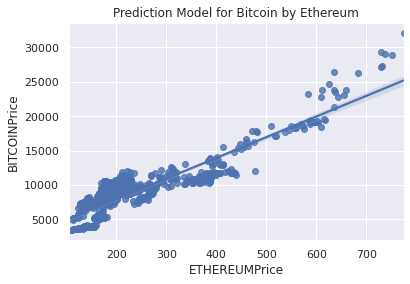

In [ ]:

#create the regression line
sns.set_theme(style="darkgrid")
sns.regplot(x=df3.ETHEREUMPrice,y=df3.BITCOINPrice)
plt.title('Prediction Model for Bitcoin by Ethereum')
plt.show()


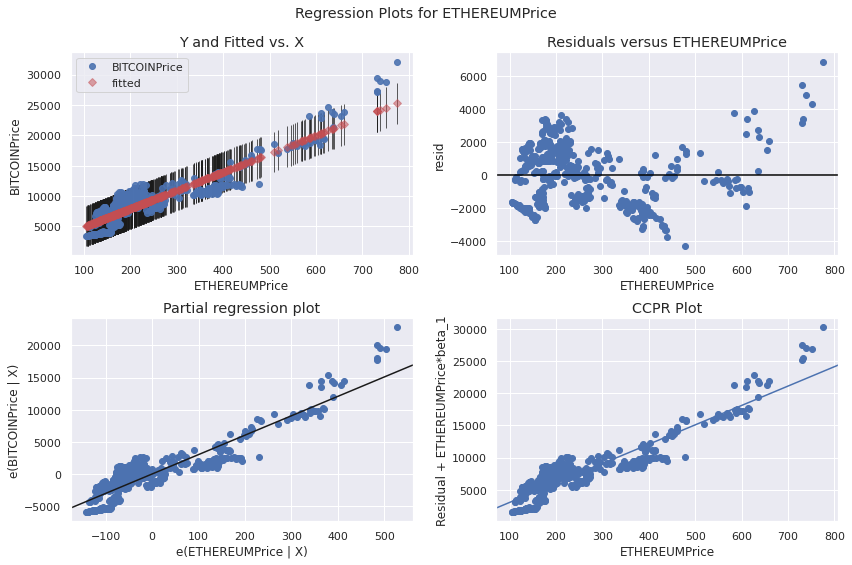

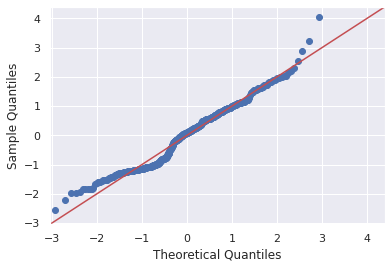

In [ ]:
# Define figure size
fig = plt.figure(figsize=(12,8))

# Produce residual plots
fig = sm.graphics.plot_regress_exog(lr_1_results, 'ETHEREUMPrice', fig=fig)

#define residuals
res = lr_1_results.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()




2.   Litecoin - Bitcoin Model



                            OLS Regression Results                            
Dep. Variable:           BITCOINPrice   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     157.6
Date:                Wed, 05 May 2021   Prob (F-statistic):           3.75e-32
Time:                        04:35:05   Log-Likelihood:                -5626.1
No. Observations:                 583   AIC:                         1.126e+04
Df Residuals:                     581   BIC:                         1.126e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4257.8817    433.890      9.813   

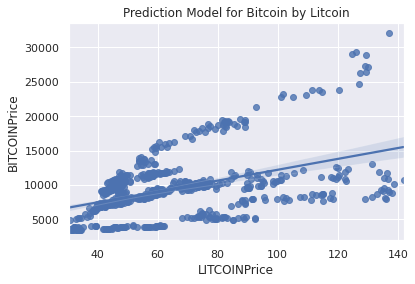

In [ ]:
#regression line for Litcoin
#Building the models
X_lr_1 = df3.LITCOINPrice
y_lr_1 = df3.BITCOINPrice
# Create new training and test sets
X_train_lr_1, X_test_lr_1, y_train_lr_1, y_test_lr_1 = train_test_split(X_lr_1, y_lr_1,
                                                    test_size=0.2,
                                                    random_state=0)

# Linear regression works well for non-standardized data, so we are skipping standardization  

# Creating the linear regression model (for one feature)
lr_1_model = sm.OLS(y_train_lr_1, sm.add_constant(X_train_lr_1) )

# Fitting the model to the data (i.e., training the model)
lr_1_results = lr_1_model.fit()

# Printing summary statistics of the model
print(lr_1_results.summary())

# Predictions on the test set
lr_1_preds = lr_1_results.predict(sm.add_constant(X_test_lr_1))

sns.set_theme(style="darkgrid")
sns.regplot(x=df3.LITCOINPrice,y=df3.BITCOINPrice)
plt.title('Prediction Model for Bitcoin by Litcoin')
plt.show()


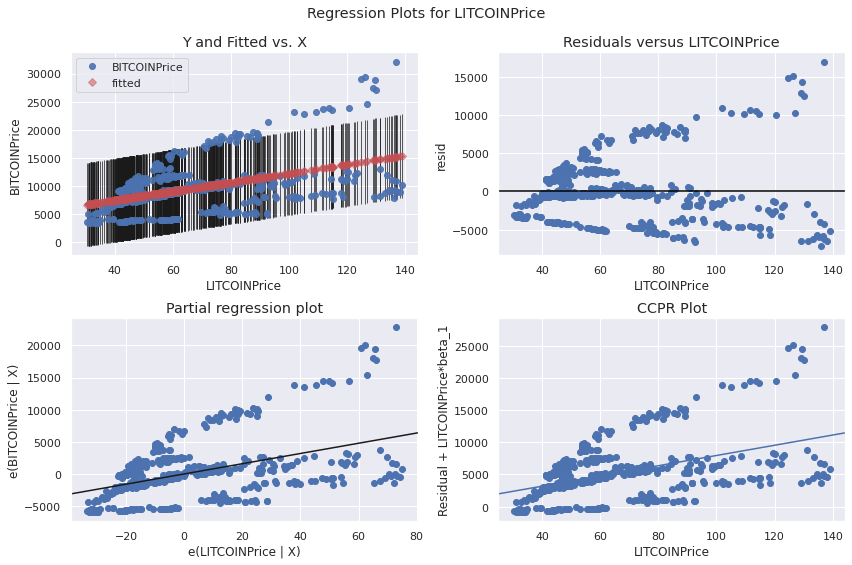

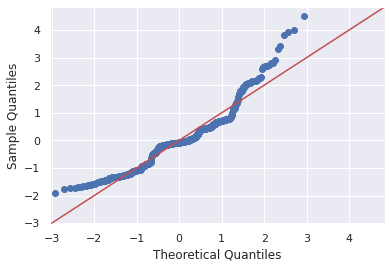

In [ ]:
# Define figure size
fig = plt.figure(figsize=(12,8))

# Produce residual plots
fig = sm.graphics.plot_regress_exog(lr_1_results, 'LITCOINPrice', fig=fig)

#define residuals
res = lr_1_results.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()


3.   XRP-Bitcoin Model



                            OLS Regression Results                            
Dep. Variable:           BITCOINPrice   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     58.99
Date:                Wed, 05 May 2021   Prob (F-statistic):           6.77e-14
Time:                        04:35:07   Log-Likelihood:                -5667.8
No. Observations:                 583   AIC:                         1.134e+04
Df Residuals:                     581   BIC:                         1.135e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5255.0543    557.755      9.422      0.0

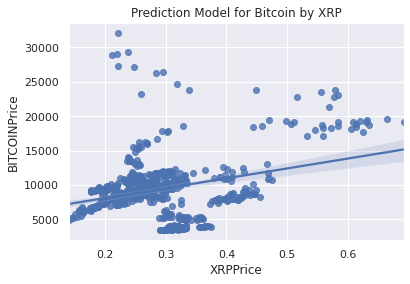

In [ ]:
#regression line for XRP
#Building the models
X_lr_1 = df3.XRPPrice
y_lr_1 = df3.BITCOINPrice
# Create new training and test sets
X_train_lr_1, X_test_lr_1, y_train_lr_1, y_test_lr_1 = train_test_split(X_lr_1, y_lr_1,
                                                    test_size=0.2,
                                                    random_state=0)

# Linear regression works well for non-standardized data, so we are skipping standardization  

# Creating the linear regression model (for one feature)
lr_1_model = sm.OLS(y_train_lr_1, sm.add_constant(X_train_lr_1) )

# Fitting the model to the data (i.e., training the model)
lr_1_results = lr_1_model.fit()

# Printing summary statistics of the model
print(lr_1_results.summary())

# Predictions on the test set
lr_1_preds = lr_1_results.predict(sm.add_constant(X_test_lr_1))
print(lr_1_preds)

sns.set_theme(style="darkgrid")
sns.regplot(x=df3.XRPPrice,y=df3.BITCOINPrice)
plt.title('Prediction Model for Bitcoin by XRP')
plt.show();




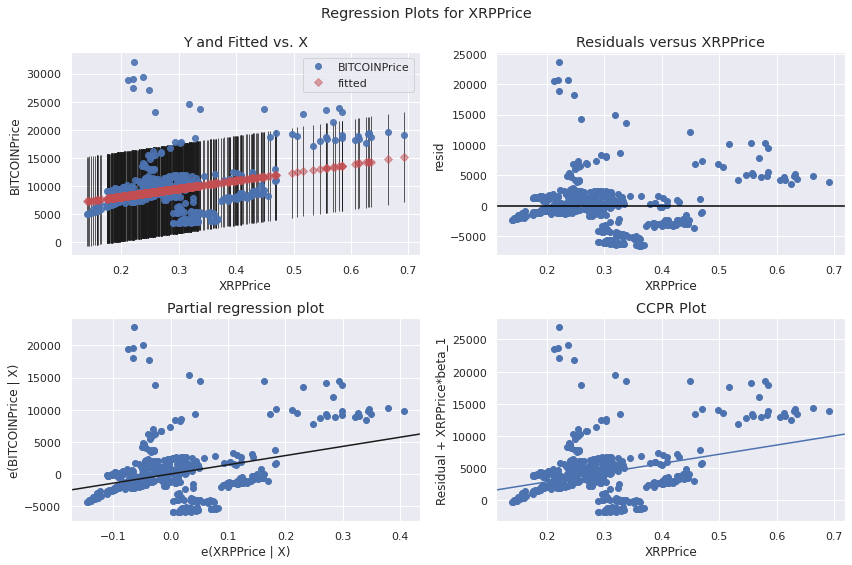

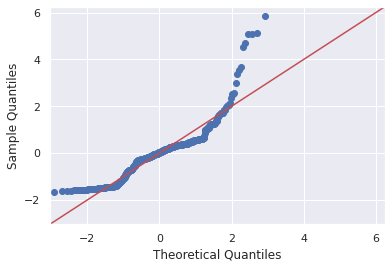

In [ ]:
# Define figure size
fig = plt.figure(figsize=(12,8))

# Produce residual plots
fig = sm.graphics.plot_regress_exog(lr_1_results, 'XRPPrice', fig=fig)

#define residuals
res = lr_1_results.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()





4.   Tether-Bitcoin Model





                            OLS Regression Results                            
Dep. Variable:           BITCOINPrice   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     79.91
Date:                Wed, 05 May 2021   Prob (F-statistic):           5.19e-18
Time:                        04:35:09   Log-Likelihood:                -5658.5
No. Observations:                 583   AIC:                         1.132e+04
Df Residuals:                     581   BIC:                         1.133e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.917e+05   3.16e+04      9.235      

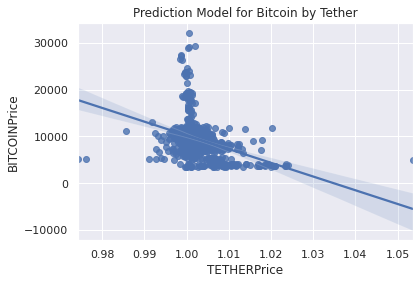

In [ ]:
#regression line for Litcoin
#Building the models
X_lr_1 = df3.TETHERPrice
y_lr_1 = df3.BITCOINPrice
# Create new training and test sets
X_train_lr_1, X_test_lr_1, y_train_lr_1, y_test_lr_1 = train_test_split(X_lr_1, y_lr_1,
                                                    test_size=0.2,
                                                    random_state=0)

# Linear regression works well for non-standardized data, so we are skipping standardization  

# Creating the linear regression model (for one feature)
lr_1_model = sm.OLS(y_train_lr_1, sm.add_constant(X_train_lr_1))

# Fitting the model to the data (i.e., training the model)
lr_1_results = lr_1_model.fit()

# Printing summary statistics of the model
print(lr_1_results.summary())

# Predictions on the test set
lr_1_preds = lr_1_results.predict(sm.add_constant(X_test_lr_1))
# print(lr_1_preds)

sns.set_theme(style="darkgrid")
sns.regplot(x=df3.TETHERPrice,y=df3.BITCOINPrice)
plt.title('Prediction Model for Bitcoin by Tether')
plt.show();


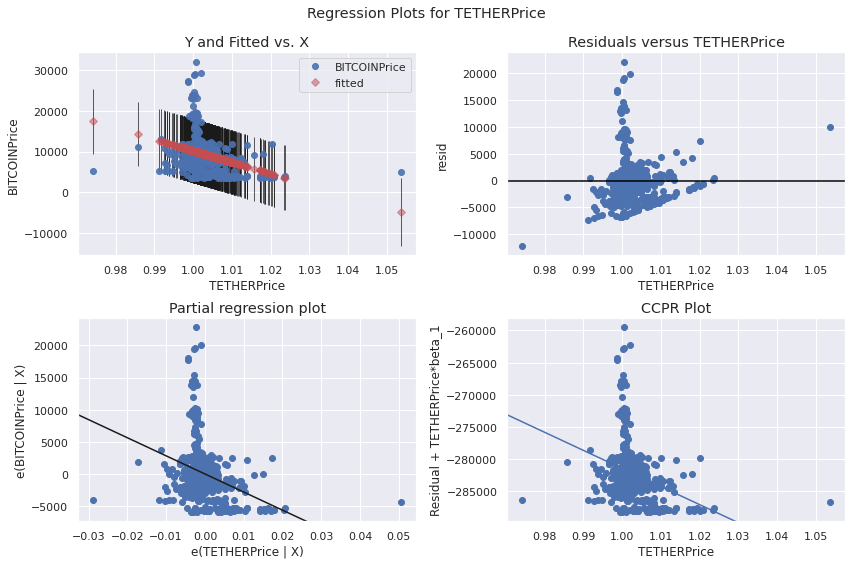

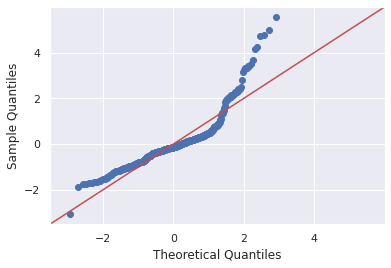

In [ ]:
# Define figure size
fig = plt.figure(figsize=(12,8))

# Produce residual plots
fig = sm.graphics.plot_regress_exog(lr_1_results, 'TETHERPrice', fig=fig)

#define residuals
res = lr_1_results.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

### Multiple Linear Regression: What happens when we combine all these features? 

Begin by creating a coeeficient matrix




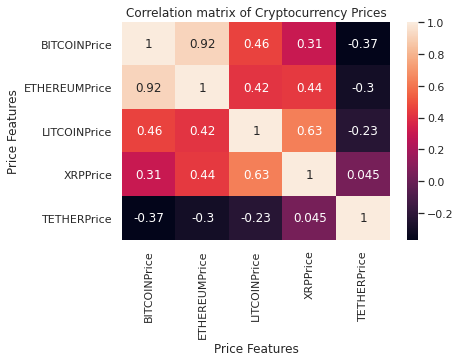

In [ ]:
import seaborn as sn

df = pd.DataFrame(df3)

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

plt.title("Correlation matrix of Cryptocurrency Prices")

plt.xlabel("Price Features")

plt.ylabel("Price Features")

plt.show()

Build the Model

In [ ]:
# Create new feature / predicted value vectors from the original data
X_mlr = df3[df3.columns[df3.columns!='BITCOINPrice']] #select all the independent columns
y_mlr = df3.BITCOINPrice 

# Create new training and test sets
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr,
                                                    test_size=0.2,
                                                    random_state=10)

# Create linear regression model (for all features)
mlr_model = sm.OLS(y_train_mlr, sm.add_constant(X_train_mlr) )

# Fitting the model to the data (i.e., training the model)
mlr_results = mlr_model.fit()

# Printing summary statistics of the model
print(mlr_results.summary())

# Predictions on the test set
mlr_preds = mlr_results.predict(sm.add_constant(X_test_mlr))


                            OLS Regression Results                            
Dep. Variable:           BITCOINPrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1114.
Date:                Wed, 05 May 2021   Prob (F-statistic):          5.98e-270
Time:                        04:35:39   Log-Likelihood:                -5064.4
No. Observations:                 583   AIC:                         1.014e+04
Df Residuals:                     578   BIC:                         1.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.93e+04    1.2e+04      2.441

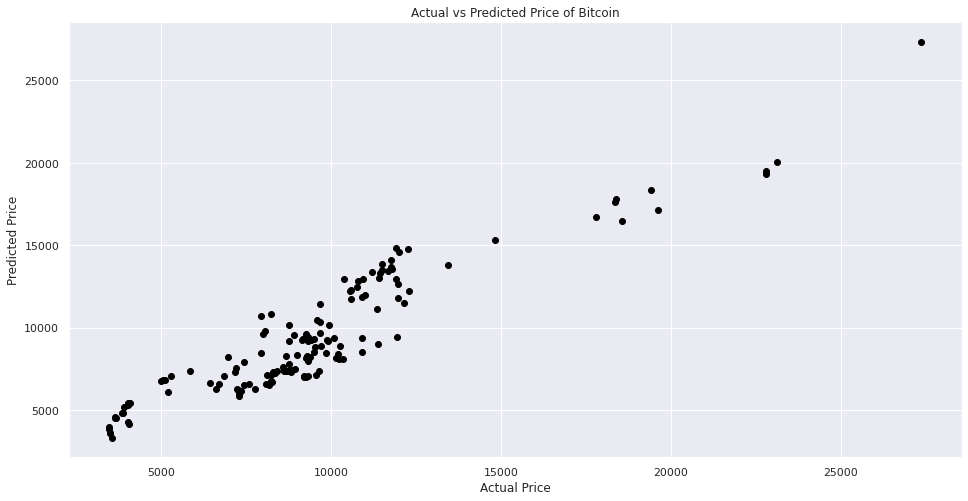

,Actual,Predicted,Deviations,Residuals
Date,,,,
2020-07-20,9164.231445,9291.006883,126.775437,1.607201e+04
2020-01-10,8166.554199,6522.787024,-1643.767175,2.701971e+06
2019-07-01,10583.134766,11742.497478,1159.362713,1.344122e+06
2020-12-17,22805.162109,19519.719801,-3285.442308,1.079413e+07
2019-08-22,10131.055664,8177.895699,-1953.159965,3.814834e+06
2020-05-13,9269.987305,8148.385169,-1121.602135,1.257991e+06
2020-09-20,10938.271484,12937.311433,1999.039949,3.996161e+06
2020-02-22,9663.181641,10365.481173,702.299532,4.932246e+05
2019-03-06,3903.942627,5196.709438,1292.766811,1.671246e+06


In [ ]:
#Building a multiple linear regression model
regressor = LinearRegression()
regressor.fit(X_train_mlr,y_train_mlr)

#predict the results
predicted=regressor.predict(X_test_mlr)

# plt.plot(y_test, predicted)

plt.subplots(figsize=(16, 8))
plt.scatter(y_test_mlr, predicted, color='black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price of Bitcoin')
plt.show()

#create a dataframe for the actual and predicted values
dframe=pd.DataFrame(y_test_mlr,predicted, (predicted - y_test_mlr)**2)
dfr=pd.DataFrame({'Actual':y_test_mlr,'Predicted':predicted,'Deviations': (predicted - y_test_mlr), 'Residuals': (predicted - y_test_mlr)**2})
dfr.head(10)

In [ ]:
# print(regressor.coef_)


#### 3. KNN regressor

Using KNN regression on the crypto currencies to Predict the Price of Bitcoin

In [ ]:
#split the data and scale it
X  = df3[['ETHEREUMPrice','LITCOINPrice','XRPPrice', 'TETHERPrice']]
y = df3['BITCOINPrice']
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#build and train the model
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(X_train,y_train)
y_knn_pred=knn_model.predict(X_test)


In [ ]:
#KNN cross validation
knn_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, X_test, y_test.astype('int'), cv=knn_kfold)
print("\nAccuracy of KNN Model is: ", results_kfold.mean()*100)


Accuracy of KNN Model is:  82.08664364269535


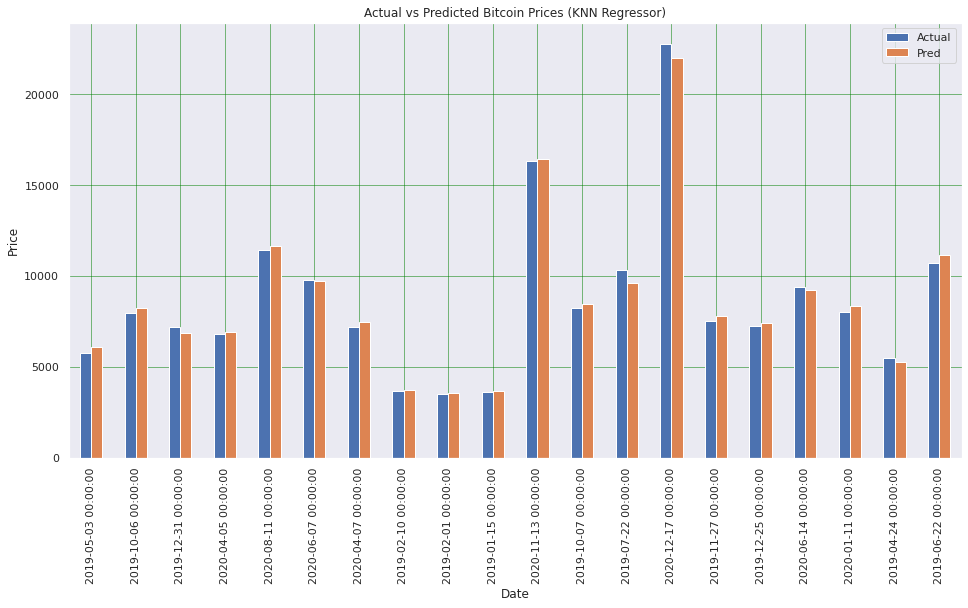

In [ ]:
#Visualize some of the results
knn_df=pd.DataFrame({"Actual":y_test,"Pred":y_knn_pred}) #set-up dataframe for the data
knn_df.head(20).plot(kind="bar",figsize=(16,8))  #plot first 20 values
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=':', linewidth=0.5, color="black")
plt.ylabel("Price")
plt.title("Actual vs Predicted Bitcoin Prices (KNN Regressor)")
plt.show()

Next, we will vary the number of neighbors and see how the accuracy changes.  How does accuracy vary with number of neighbours?

In [ ]:
# lets see how the accuracy varies with the number of neighbors
from sklearn import metrics
scores = []
m = range(1,25)
# Check number of neighbors
for k in m:
    # Initialize the KNN Classifier
    knn_regressor=KNeighborsRegressor(n_neighbors = k)
    model = knn_regressor.fit(X_train,y_train)
    y_pred=model.predict(X_test)
  
    knn_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
    results_kfold = model_selection.cross_val_score(model, X_test, y_test.astype('int'), cv=knn_kfold)
    scores.append(results_kfold.mean()*100)
print(scores)


[90.89436396399698, 84.23886725908835, 84.28430364464555, 83.30857447196742, 82.08664364269535, 80.32007697960017, 78.88653373577233, 77.26440885344115, 75.08876615114953, 75.62624887665856, 74.68500071553335, 73.1992574176701, 71.29419968604866, 70.70375743349707, 70.4426187381022, 69.70830818761242, 68.92670565653759, 67.99952219349483, 67.69128431499902, 66.42141526205148, 66.55371613664397, 65.51959972992032, 64.65375490495246, 63.74158775033123]


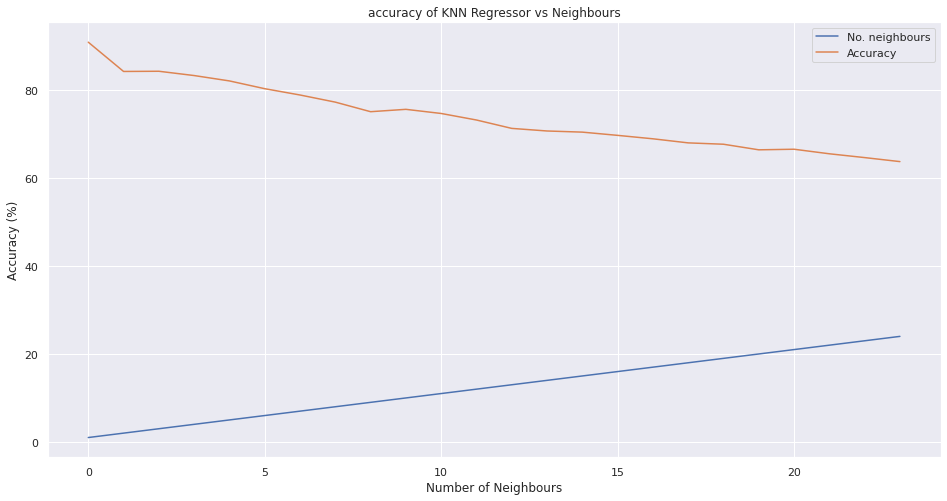

In [ ]:

data = pd.DataFrame({"No. neighbours":m,"Accuracy":(scores)})
# plt.plot(data["No. neighbours"], data["Accuracy"])
data.plot(kind="line", figsize=(16,8))
# plt.ylim(0,100)
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy (%)')
plt.title('accuracy of KNN Regressor vs Neighbours')
plt.show()



Implement Grid search on the parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsRegressor()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#confirms the results from the above graph on the optimal number of neighbors
knn_gscv.best_params_

{'n_neighbors': 1}

#### 4. SVM Regression Model

Using Support Vector Machines for Regression and Predicting the Price of Bitcoin

In [ ]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel="linear") # initialize model
svm_model=svm_regressor.fit(X_train,y_train)
y_svm_pred=svm_model.predict(X_test)

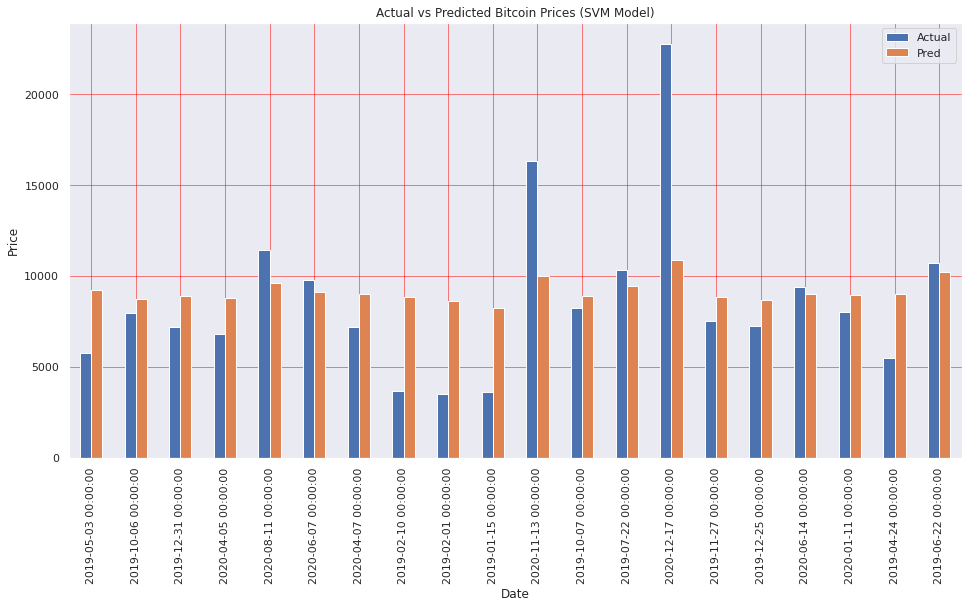

In [ ]:
#create data frame and plot first 20 values
svm_df=pd.DataFrame({"Actual":y_test,"Pred":y_svm_pred})
svm_df.head(20).plot(kind="bar",figsize=(16,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="red")
plt.grid(which="minor", linestyle=':', linewidth=0.5, color="green")
plt.ylabel("Price")
plt.title("Actual vs Predicted Bitcoin Prices (SVM Model)")
plt.show()

This section considers the Markers of the Economy and how they can be used to predict the price of Bitcoin

In [ ]:
#import data sets
btc = pd.read_csv('https://raw.githubusercontent.com/stephaniesanjines/ds10finalproject/main/BTC-Clean.csv')
gold = pd.read_csv('https://raw.githubusercontent.com/stephaniesanjines/ds10finalproject/main/GOLD-Clean.csv')
nasdaq = pd.read_csv('https://raw.githubusercontent.com/stephaniesanjines/ds10finalproject/main/NASDAQ-Clean.csv')

#merge our data set by taking only the closing prices
df4 = pd.concat([btc['Close'],gold['Close'], nasdaq['Close']], axis=1)
#rename the columns
df4.columns = ['bitcoinPrice', 'goldPrice', 'nasdaqindex']
df4.head()


,bitcoinPrice,goldPrice,nasdaqindex
0,3943.409424,160.710007,6665.939941
1,3836.741211,163.369995,6463.500000
2,3857.717529,162.320007,6738.859863
3,4025.248291,160.110001,6823.470215
4,4030.847900,160.179993,6897.000000


In [ ]:
#run as it is: this data was saved to your working environment earlier
snp = pd.read_csv('/content/snp_data.csv')
snpmerge = snp.merge(gold, 'right', on='Date') #data cleaning and pre-processing by removing missing values


In [ ]:
dow = pd.read_csv('/content/dow_data.csv')
dowmerge = dow.merge(gold, 'right', on='Date')


In [ ]:
eth= pd.read_csv('/content/ethereum_csv.csv')

ethgoldmerge = eth.merge(gold, 'right', on='Date')


In [ ]:
#merge our data set by taking only the closing prices
finaldfr = pd.DataFrame({'bit_price':df4['bitcoinPrice'],'Gold_Price': ethgoldmerge['Close_y'], 'Eth_Price': ethgoldmerge['Close_x'], 
                         'nasdaq_index': df4['nasdaqindex'], 'S&P Index': snpmerge['Close_x'], 
                         'dow jones index': dowmerge['Close_x']})
finaldfr.tail(10)

,bit_price,Gold_Price,Eth_Price,nasdaq_index,S&P Index,dow jones index
491,22805.162109,312.049988,642.868958,12764.750000,3722.479980,30303.369141
492,23137.960938,303.380005,654.811951,12755.639648,3709.409912,30179.050781
493,22803.082031,303.459991,609.817871,12742.519531,3694.919922,30216.449219
494,23783.029297,294.149994,634.854187,12807.919922,3687.260010,30015.509766
495,23241.345703,299.200012,583.714600,12771.110352,3690.010010,30129.830078
496,23735.949219,301.019989,611.607178,12804.730469,3703.060059,30199.869141
497,27084.808594,298.070007,730.397339,12899.419922,3735.360107,30403.970703
498,27362.437500,298.470001,731.520142,12850.219727,3727.040039,30335.669922
499,28840.953125,305.920013,751.618958,12870.000000,3732.040039,30409.560547
500,29001.720703,299.640015,737.803406,12888.280273,3756.070068,30606.480469


Creating a KNN Regression Model to Predict Price of Bitcoin from the NASDAQ Index, S&P 500 Index, Dow Jones Index, Gold Price and Ethereum Price. 

In [ ]:

#split the data and scale it
X  = finaldfr[['Gold_Price','Eth_Price','nasdaq_index', 'S&P Index', 'dow jones index']]
y = finaldfr['bit_price']
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#build and train the model
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(X_train,y_train)
y_knn_pred=knn_model.predict(X_test)

#KNN cross validation
knn_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, X_test, y_test.astype('int'), cv=knn_kfold)
print("\nAccuracy: ", results_kfold.mean()*100)

# lets see how the accuracy varies with the number of neighbors
from sklearn import metrics
scores = []
m = range(1,25)
# Check number of neighbors
for k in m:
    # Initialize the KNN Classifier
    knn_regressor=KNeighborsRegressor(n_neighbors = k)
    model = knn_regressor.fit(X_train,y_train)
    y_pred=model.predict(X_test)
  
    knn_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
    results_kfold = model_selection.cross_val_score(model, X_test, y_test.astype('int'), cv=knn_kfold)
    scores.append(results_kfold.mean()*100)
print(scores)


Accuracy:  78.75229556291265
[76.23107007403385, 83.91321754675916, 83.16590970013186, 81.8574915426177, 78.75229556291265, 76.44302989958496, 76.3821655137312, 73.86641906673061, 72.54254625722018, 69.47329374601009, 68.42922451856528, 63.702656705061834, 61.24663115134938, 60.243718834280315, 59.769249175123626, 61.13096442635694, 59.020991079434424, 59.08089830955798, 58.15697958541525, 54.326900061429754, 52.58618988382485, 51.65959219669168, 50.32357025838172, 49.6790262371923]


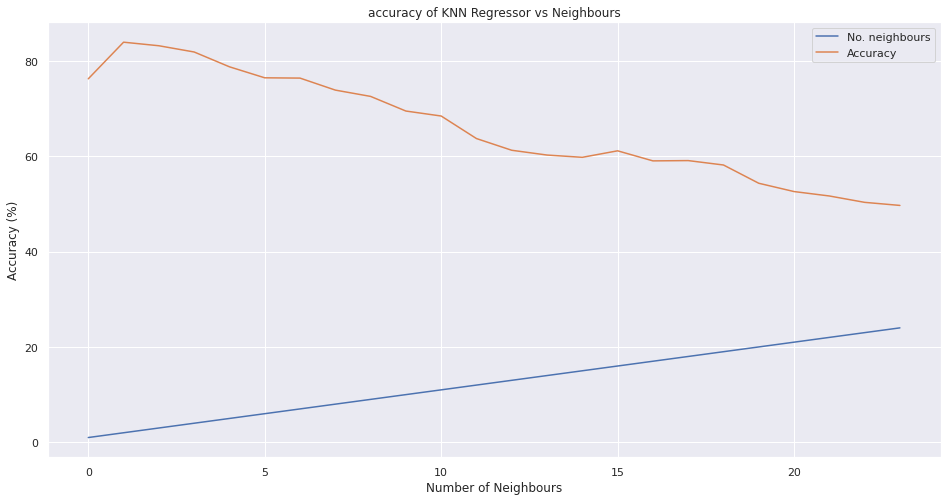

In [ ]:
data = pd.DataFrame({"No. neighbours":m,"Accuracy":(scores)})
# plt.plot(data["No. neighbours"], data["Accuracy"])
data.plot(kind="line", figsize=(16,8))
# plt.ylim(0,100)
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy (%)')
plt.title('accuracy of KNN Regressor vs Neighbours')
plt.show()


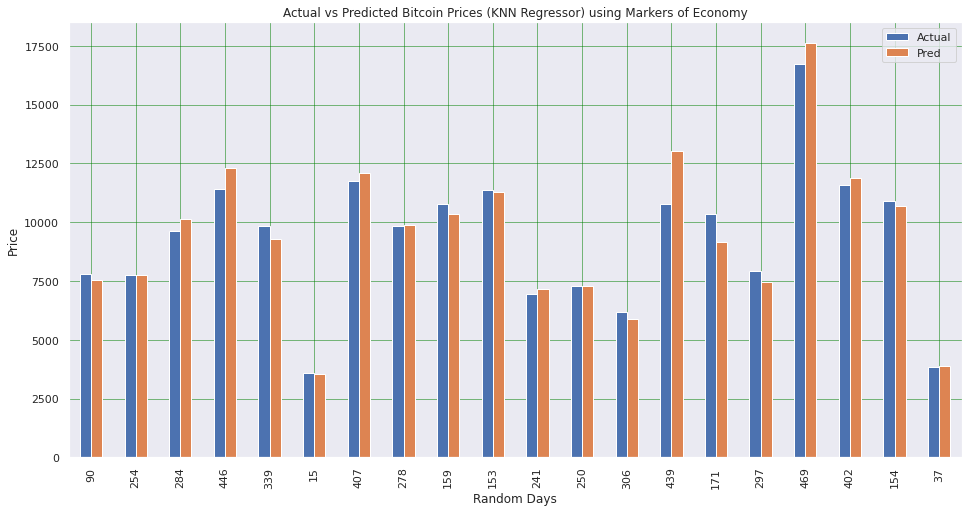

In [ ]:
knn_df2=pd.DataFrame({"Actual":y_test,"Pred":y_knn_pred}) #set-up dataframe for the data
knn_df2.head(20).plot(kind="bar",figsize=(16,8))  #plot first 20 values
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=':', linewidth=0.5, color="black")
plt.ylabel("Price")
plt.xlabel('Random Days')
plt.title("Actual vs Predicted Bitcoin Prices (KNN Regressor) using Markers of Economy")
plt.show()

Multiple Linear regression Model for the NASDAQ Index, S&P 500 Index, Dow Jones Index, Gold Price and Ethereum Price.

In [ ]:
# Create new feature / predicted value vectors from the original data
X_mlr = finaldfr[finaldfr.columns[finaldfr.columns!='bit_price']] #select all the independent columns
y_mlr = finaldfr.bit_price

# Create new training and test sets
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr,
                                                    test_size=0.2,
                                                    random_state=10)

# Create linear regression model (for all features)
mlr_model = sm.OLS(y_train_mlr, sm.add_constant(X_train_mlr) )

# Fitting the model to the data (i.e., training the model)
mlr_results = mlr_model.fit()

# Printing summary statistics of the model
print(mlr_results.summary())

# Predictions on the test set
mlr_preds = mlr_results.predict(sm.add_constant(X_test_mlr))

                            OLS Regression Results                            
Dep. Variable:              bit_price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     577.1
Date:                Wed, 05 May 2021   Prob (F-statistic):          8.63e-179
Time:                        05:05:27   Log-Likelihood:                -3462.6
No. Observations:                 400   AIC:                             6937.
Df Residuals:                     394   BIC:                             6961.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4749.8947   1166.127     

***This is the End of the Notebook***
